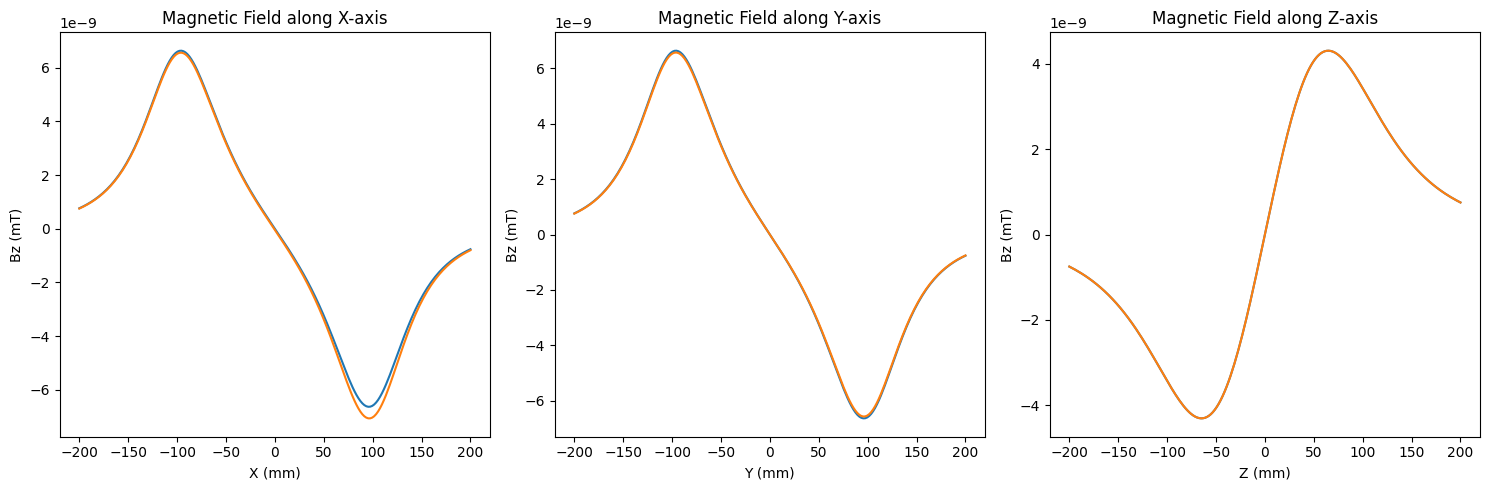

In [21]:
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

def biot_savart_loop(radius, current, observation_point, loop_center, num_segments=100):
    mu_0 = 4 * np.pi * 1e-7  # Tm/A

    # Discretize the loop into small segments
    theta = np.linspace(0, 2 * np.pi, num_segments)
    dl = 2 * np.pi * radius / num_segments  # Length of each segment

    # Positions of the current elements on the loop
    x_prime = loop_center[0] + radius * np.cos(theta)
    y_prime = loop_center[1] + radius * np.sin(theta)
    z_prime = loop_center[2] * np.ones_like(theta)

    B = np.zeros(3)  # Initialize magnetic field vector

    for i in range(num_segments):
        r_prime = np.array([x_prime[i], y_prime[i], z_prime[i]])
        dl_vector = dl * np.array([-np.sin(theta[i]), np.cos(theta[i]), 0])  # Tangential to the loop

        r_vec = np.array(observation_point) - r_prime
        r_mag = np.linalg.norm(r_vec)

        if r_mag != 0:
            dB = (mu_0 * current / (4 * np.pi)) * (np.cross(dl_vector, r_vec) / r_mag**3)
            B += dB

    return B

def method_2(radius, current, r):
    distance = radius  # distance between the centers of the loops

    # Initialize arrays for Bx, By, Bz
    Bx = np.zeros_like(r)
    By = np.zeros_like(r)
    Bz = np.zeros_like(r)

    # Calculate the magnetic field along each axis
    for i, xi in enumerate(r):
        B1 = biot_savart_loop(radius, current, [xi, 0, 0], [0, 0, distance/2])
        B2 = biot_savart_loop(radius, -current, [xi, 0, 0], [0, 0, -distance/2])
        Bx[i] = B1[0] + B2[0]

        B1 = biot_savart_loop(radius, current, [0, xi, 0], [0, 0, distance/2])
        B2 = biot_savart_loop(radius, -current, [0, xi, 0], [0, 0, -distance/2])
        By[i] = B1[1] + B2[1]

        B1 = biot_savart_loop(radius, current, [0, 0, xi], [0, 0, distance/2])
        B2 = biot_savart_loop(radius, -current, [0, 0, xi], [0, 0, -distance/2])
        Bz[i] = B1[2] + B2[2]

    return Bx, By, Bz

def method_1(radius, current, r):
    distance = radius  # distance between the centers of the loops

    # Create the two circular loops
    loop1 = magpy.current.Circle(current=+current, diameter=2*radius)
    loop2 = magpy.current.Circle(current=-current, diameter=2*radius)

    # Position the loops at +distance/2 and -distance/2 along the z-axis
    loop1.move([0, 0, distance/2])
    loop2.move([0, 0, -distance/2])

    # Create a collection of the two loops
    collection = magpy.Collection(loop1, loop2)
    collection.show()
    # Calculate the magnetic field along each axis using the collection
    Bx = [collection.getB([xi, 0, 0]) for xi in r]
    By = [collection.getB([0, yi, 0]) for yi in r]
    Bz = [collection.getB([0, 0, zi]) for zi in r]

    # Extract the Bz component (as it is the most significant component for this configuration)
    Bx = np.array(Bx)[:, 0]
    By = np.array(By)[:, 1]
    Bz = np.array(Bz)[:, 2]
    return Bx, By, Bz

# Define parameters
radius = 100  # in mm
current = 1  # in A
r = np.linspace(-200, 200, 200)  # range in mm

Bx, By, Bz = method_1(radius, current, r)
Bx_, By_, Bz_ = method_2(radius, current, r)

# Plot the magnetic field along each axis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(r, Bx)
plt.plot(r, Bx_)


plt.title('Magnetic Field along X-axis')
plt.xlabel('X (mm)')
plt.ylabel('Bz (mT)')

plt.subplot(1, 3, 2)
plt.plot(r, By)
plt.plot(r, By_)

plt.title('Magnetic Field along Y-axis')
plt.xlabel('Y (mm)')
plt.ylabel('Bz (mT)')

plt.subplot(1, 3, 3)
plt.plot(r, Bz)
plt.plot(r, Bz_)
plt.title('Magnetic Field along Z-axis')
plt.xlabel('Z (mm)')
plt.ylabel('Bz (mT)')

plt.tight_layout()